# 로지스틱 회귀
- 분류임! 

럭키백 
- 구매자는 머가 들어있는지 모르는 제품을 삼
- 그 제품에는 무슨 생선이 몇퍼확률로 있을지 적혀있어야함


## 럭키백의 확률

### 데이터 준비하기

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
# 판다스로 데이터 불러오면 csv의 첫줄을 자동으로 인식해서 열제목으로 만듦 ex_ weifht , length

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))
# unique 함수를 사용하면 해당 열의 고유값을 추출할 수 있음
# 이 열은 생선의 종류이므로 타겟값이 됨 

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 데이터 열을 선택해서 넘파이 배열로 변경 후 저장 

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
# 타겟용 만들기 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 훈련세트와 테스트세트 표준화 전처리를 위해서 Standard Scaler 사용 
ss = StandardScaler()
# 훈련시키고 
ss.fit(train_input)

# 데이터들을 변환 
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


다중 분류 
- 타겟의 속성은 7가지 종류의 생선들 
- 타겟데이터에 2가지 아싱의 클래스가 포함된 문제 **다중 분류**



In [ ]:
print(kn.classes_)
# 순서는 알파벳 순으로 정렬됨 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# predict_proda() 메서드는 클래스별 확률 값을 반환 
# 5개 샘플에 대한 확률 출력을 해보자! 

#round로 반올림 시키는데 decimals=4로 소수점 4번째 자리까지 표기 
print(np.round(proba, decimals=4))

#각 샘플에 대한 확률 
#['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
#첫번째 행은 3번째 perch일 확률이 100퍼 
#4번재 항목은 perch 확률이 67퍼 roach일 확률잉 33퍼 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
# kneighbors() 함수 사용 인수는 무조건 2차원 배열 
# 4번째 샘플 하나 선택해서 거리와 인덱스를 추출
# 해당 인덱스 즉 주벼에 있는 인덱스 값들을 너헝서 머가 있는지 확인
# 3개중 2개가 perch 니까 67퍼 1개가 roach니까 33퍼 스코어랑 맞음 
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


문제점!
- 3개에서 확률을 구하는 거니까 확률이라고 말하기가 애매 다른방법이 필요!

## 로지스틱 회귀

- 회귀지만 분류 모델 
- 선형 방적식을 학습 
> z = a * (weight) + b * (legth ) + c* (diagnoal) + d * (height) + e * (weight) +f 

- a,b,c,d,e 는 가중치 혹은 계수 
- z 는 어떤 값도 가능하지만 확률을 위해 0 ~ 1 사이 값이 되어야함 

## 시그모이드 함수 = 로지스틱 함수 
- z가 큰 음수일 때 0이 되고 z가 큰 양수일때 1이되도록 하는 함수 
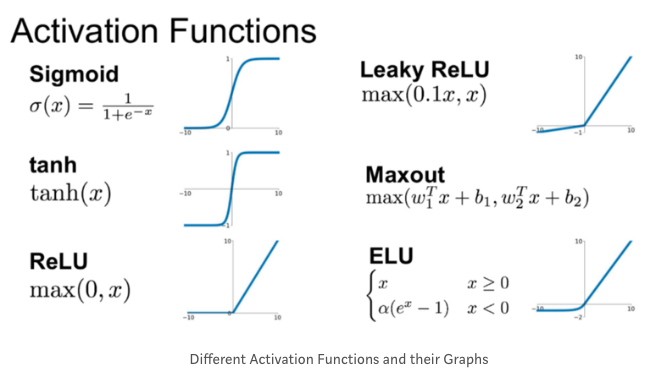

시그모이드 식에서 여기선 e^-x 에서 x 는 z 

- z가 무한하게 큰 음수익 경우 -에 가까워지고 
- z가 무한하게 큰 양수이면 1에 가까워짐 
- z가 0이면 0.5 

** 즉 z는 뭘 해도 0 - 1 사이를 벗어나지 않기에 확률 계산에 용이하다 ! 

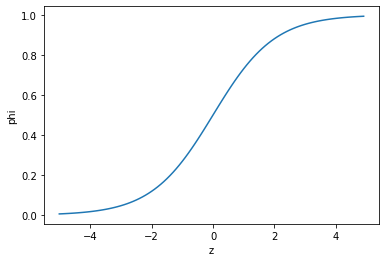

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X 축 범위는 -5에서 5 ... 간격은 0.1
z = np.arange(-5, 5, 0.1)

# Y축은 해당 시그모어식 X=Z
# exp -> 밑이 자연상수 e인 지수함수(e^x)로 변환
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
# 불리언 인덱싱 
# A와C만 골라짐
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 빙어와 방어에 관련된 행만 뽑아내기 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

# 첫번째 = 0에 대한 음성클래스 확률
# 두번째 = 1에 대한 양성 클래스 확률 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 클래스 알아보기 
# 알파벳순으로 bream이 음성 smelt가 양성 
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)
# coef_ 는 변수들의 값 
# interceot_ 는 y절편 

# 0.0404*(무게)+ -0.576*(길이) + -0.663*(대각선?) + 1.0.13*(높이) -0.732*(가로) -2.161
# 로지스틱 회귀 모델이 학습한 방적식

# 선형회귀랑 아주 비슷함 

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# decision_Function() -> z 값 출력 가능 
decisions = lr.decision_function(train_bream_smelt[:5])

print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# z값을 시그모이드 함수에 넣으면 값을 얻기 가능 -> 0 ~ 1  사이의 값이 나옴 이게 확률
# 둘 중 하나의 확률 
# scipy 라이브러리의 expit 함수를 사용하자 exp보다 편리하고 안전함 
from scipy.special import expit

# z 값을 시그모이드에 넣으면 확률을 얻기 가능 
# z값들을 넣어서 확률을 계싼 
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

# 첫번째 = 0에 대한 음성클래스 확률
# 두번째 = 1에 대한 양성 클래스 확률 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


보면 양수의 확률에 관해서 같은 값을 출력함을 확인 가능 

decision_function()메서드는 양성 클래스에 대한 z 값을 반환한다 

이진분류일 때
-predict_proba() 음성과 양성 다 확률 예측함  

coef_ -> 각 x값들 ?선형방정식 계쑤
intercept_ -> y 절편 

### 로지스틱 회귀로 다중 분류 수행하기

LogisticRegression 클래스
- 기본적으로 반복적인 알고리즘 사용 
- max_iter 반복횟수 지정 기본값 100
- 릿지 회귀 같이 계수 제곱을 규제 LogisticRegression에서는 규제 제어를 c로함 c가 작을 수록 규제가 커지고 기본값은 1 여기선 20으로 규제가 완화됨 

In [ ]:
# 반복 1000번 c=20 규제 조금 완화 클수록 완화
lr = LogisticRegression(C=20, max_iter=1000)
#훈련 시킴 
lr.fit(train_scaled, train_target)

# 7개 항목 들어가 있는 거로 훈련 

# 확률이 93퍼정도 
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])


print(np.round(proba, decimals=3))
#각 7개 값에 따른 확률들이 다 나와있다\
#['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)
# 행이 7개다 = z 가 7갸 계산한다
# 다중분류는 클래스마다 z값을 하나씩 계산 
# 가장 높은 z값 출력하는 클래스가 예측클래스가 됨 
# 확률의 경우 이진분류라면 시그모이드로 z가 0 -1 로 변환하지만 다중 분류는 소프트맥스 함수 사용해서 
# 7개 z값을 확률로 변환시킴 

(7, 5) (7,)


소프트 맥스 함수 
- 시그모이드 함수 :  방정식 출력값을 0 -1 사이로 압축
- 소프트맥스 함수 : 여러 개의 선형 방적식 출력값을 0 -1 사이로 압축하고 전체 합이 1이 되도록 함 이를 위해 지수함수를 사용하기에 정규화된 지수함수라고 함 

In [ ]:
# decision_function() 메서드에서 z1-z7값을 구한다 
# 물고기 7개 에대한 z 값들 
# 
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

# 물고기 7개 에대한 확률 softmax 함수는 각 값들을 뭉그러뜨려 0 -1 로 만들어무 
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
